<a href="https://colab.research.google.com/github/Ndifreke000/Machine-Learning-Algorithms/blob/main/Copy_of_Locally_Linear_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importng library

In [ ]:
import pandas as pd
import io
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import LocallyLinearEmbedding
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
uploaded = files.upload()

Saving 8 - crabs.csv to 8 - crabs.csv


Initial Study of the Dataset


In [ ]:
crabs_data = pd.read_csv("8 - crabs.csv")
# Rename the columns
crabs_data = crabs_data.rename(columns={'sp':'Species', 'FL':'Frontal Lobe', 'RW':'Rear Width', 'CL':'Carapace Midline', 'CW':'Maximum Width', 'BD':'Body Depth'})

crabs_data['Species'] = crabs_data['Species'].map({'B':'Blue', 'O':'Orange'})

crabs_data['sex'] = crabs_data['sex'].map({'M':'Male', 'F':'Female'})
crabs_data.head()

,Species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2


In [ ]:
crabs_data['class'] = crabs_data.Species + crabs_data.sex
crabs_data['class'].value_counts()

BlueMale        50
BlueFemale      50
OrangeMale      50
OrangeFemale    50
Name: class, dtype: int64

LLE

In [ ]:
data_columns = ['Frontal Lobe', 'Rear Width', 'Carapace Midline', 'Maximum Width', 'Body Depth']


In [ ]:
crabs_min_max = crabs_data.copy()
crabs_min_max[data_columns] = MinMaxScaler().fit_transform(crabs_data[data_columns])

In [ ]:
crabs_min_max.head()

Use Locally Linear Embedding

In [ ]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=15)
crabs_lle = lle.fit_transform(crabs_min_max[data_columns])

print('Reconstruction error: ',lle.reconstruction_error_)

crabs_min_max[['LLE1', 'LLE2']] = crabs_lle

Reconstruction error:  2.153028802201499e-06


<Axes: xlabel='LLE1', ylabel='LLE2'>

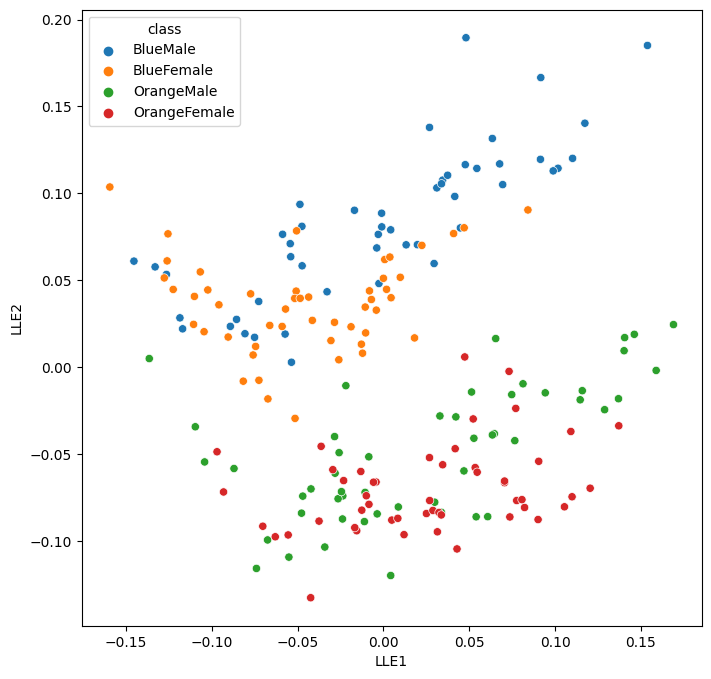

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='LLE1', y='LLE2', hue='class', data=crabs_min_max)

3D LLE

In [ ]:
lle = LocallyLinearEmbedding(n_components=3,n_neighbors=15)
crabs_lle = lle.fit_transform(crabs_min_max[data_columns])
crabs_min_max[['LLE1','LLE2','LLE3']] = crabs_lle

print('Reconstruction error: ',lle.reconstruction_error_)

Reconstruction error:  1.5214133598291706e-05


In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')

colors_crabs = {'BlueFemale':'y','BlueMale':'b','OrangeFemale':'r','OrangeMale':'g'}

plt.scatter(crabs_min_max.LLE1,crabs_min_max.LLE2,zs=crabs_min_max.LLE3,
            depthshade=False, c = crabs_data['class'].apply(lambda x: colors_crabs[x]),s=100)